# Probabability Density vs Probability, Why small time vs Large time formula

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.random.normal(0, 10, 100)
x.shape

(100,)

In [113]:
def gauss_prob(x,mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

In [114]:
from scipy import integrate
def prob_rt(t_arr,mu, sigma):
    N_t = len(t_arr)
    prob_arr = np.zeros((N_t-1,1))
    for i in range(0, N_t-1):
        prob_arr[i] = integrate.quad(gauss_prob, t_arr[i], t_arr[i+1], args=(mu, sigma))[0]

    return prob_arr

def calculate_histogram(x_axis, y_axis):
    x_axis = np.sort(x_axis)
    histcounts, _ = np.histogram(y_axis, bins=x_axis)
    prob = histcounts/np.sum(histcounts)
    return prob


In [110]:
mu = 0; sigma = 5;

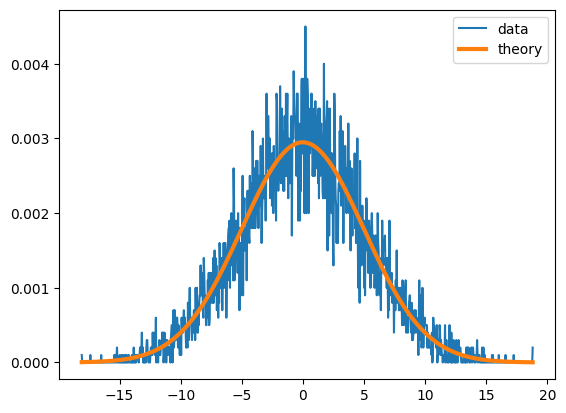

In [116]:
sim_data = np.random.normal(mu, sigma, 10000)    
t_pts = np.linspace(min(sim_data), max(sim_data), 1000)
prob = calculate_histogram(t_pts, sim_data)
plt.plot(t_pts[:-1], prob); 

RT_theory = prob_rt(t_pts, mu, sigma) 
plt.plot(t_pts[:-1], RT_theory, linewidth=3);
plt.legend(['data', 'theory'])

# plt.hist(RTs, density=True)
plt.show()

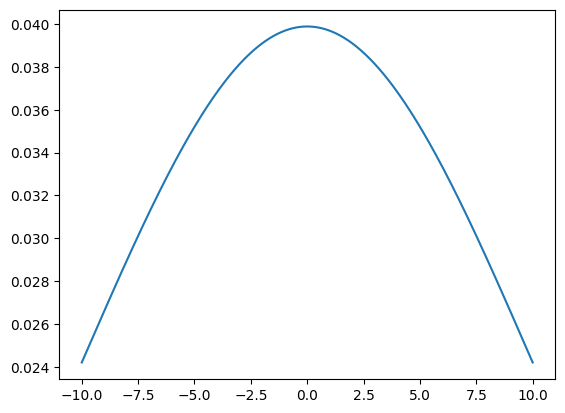

In [19]:
x1 = np.linspace(-10,10,1000)
plt.plot(x1,gauss_prob(x1, 0,10));

In [29]:
from scipy import integrate
delta_x = 0.001; pdx = np.zeros((len(x1)-1,1));
for i, x1_v  in enumerate(x1[:-1]):
    pdx[i] = integrate.quad(gauss_prob, x1[i], x1[i+1], args=(0, 10))[0]

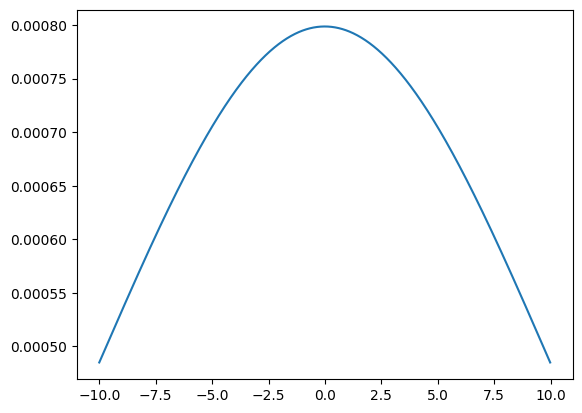

In [31]:
plt.plot(x1[:-1], pdx);

In [64]:
def total_rt_density(t, mu):
    # for a = 2, w = 0.5
    sum_term = 0.0
    for k in range(50):  # Sum up to 100 terms
        term = (-1)**k * (2*k + 1) * np.exp(-((2*k + 1)**2 * np.pi**2 * t) / 8)
        sum_term += term
    
    
    result = (np.pi / 2) * np.cosh(mu) * np.exp(-mu**2 * t / 2) * sum_term
    return result

# Why one should use small time and large times

for a = 2, w = 0.5
when v = 2, the area under probability is nearly 1. but when v = 5, the time would be much shorter, so one has to use a different density expression, but if u use the same for longer times(>0.25), u get wrong answers like total prob = 0.5, when it is near to 1 due to high velocity

In [75]:
integrate.quad(total_rt_density, 0, np.inf, args=(2))[0],integrate.quad(total_rt_density, 0, np.inf, args=(5))[1]

((0.9760553920629952, 1.1349344319192145e-11),
 (0.528089920863132, 8.666265096835706e-10))

In [52]:
def rtd_low_bound(t, v, a, w):
    term1 = (np.pi/a**2)*np.exp(-v*a*w - (v**2 * t/2))
    term2 = [ k * np.exp(-(k**2 * np.pi**2 * t)/(2 * a**2)) * np.sin(k*np.pi*w) for k in range(1,50) ]
    return term1*np.sum(term2)

In [79]:
integrate.quad(rtd_low_bound, 0, np.inf, args=(-1,2,0.5))[0] + integrate.quad(rtd_low_bound, 0, np.inf, args=(1,2,0.5))[0]

1.0196360926956705

In [100]:
import time
start_time = time.time()
k_vals = np.linspace(1,10,10)
sum_exp_term = np.exp(-(k_vals**2 * np.pi**2 * 1)/(2*2**2))
end_time = time.time()
print("Time taken:", end_time - start_time)


Time taken: 0.02322077751159668


In [101]:
import time
start_time = time.time()
sum_exp_term = []
for k in k_vals:
    sum_exp_term.append(np.exp(-(k**2 * np.pi**2 * 1)/(2*2**2)))
end_time = time.time()
print("Time taken:", end_time - start_time)
# sum_exp_term

Time taken: 1.5886266231536865


In [131]:
t = 1.1241700000000001; v,a,w = -4.075927734375, 11.4097900390625, 0.8246093750000001; K_max=50
non_sum_term = (np.pi/a**2)*np.exp(-v*a*w - (v**2 * t/2))
k_vals = np.linspace(1, K_max, K_max)
sum_sine_term = np.sin(k_vals*np.pi*w)
sum_exp_term = np.exp(-(k_vals**2 * np.pi**2 * t)/(2*a**2))
sum_result = np.sum(k_vals * sum_sine_term * sum_exp_term)

sum_result*non_sum_term

1.0647527577205237e-05